In [1]:
!pwd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..'))

In [4]:
import QA_DwaveSampler_AutoEmbedding as qda
import pandas as pd
import numpy as np
import timeit

In [5]:
#今回のデータ, parameters
bit = 25
n = 10
num_reads = 1000
chain_strength = 12

In [6]:
num_valid_y = []
time_list = []
p_list = []
for num in [0, 1, 2, 3, 4]:
    path = '../../input/ost{}_{}.csv'.format(bit, num)
    df = pd.read_csv(path, sep=',')
    bqm = qda.make_Hamiltonian(df)
    time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)
    QDA = qda.QA_DSampler_AEmbedding(df, bqm, time_once, n, num_reads, chain_strength)
    valid_y_info_list, valid_y_num = QDA.find_valid_y_ntimes()
    
    num_valid_y.append(valid_y_num)
    time_list.append(QDA.time_measurement())
    p_list.append(qda.p_value(df, valid_y_info_list))
    
    print('number of valid y of {}bit_{} data is {}'.format(bit, num, num_valid_y[-1]))
    print('calculation time of {}bit_{} data is {}'.format(bit, num, time_list[-1]))
    print('p value of {}bit_{} data is {}'.format(bit, num, p_list[-1]))
    print('------------------------------------------------------------')
print('mean number of valid y of {}bit data is {}'.format(bit, sum(num_valid_y)/len(num_valid_y)))
print('mean calculation time of {}bit data is {}'.format(bit, sum(time_list)/len(time_list)))
print('mean p value of {}bit data is {}'.format(bit, sum(p_list)/len(p_list)))

number of valid y of 25bit_0 data is 90
calculation time of 25bit_0 data is 0.008016615999999943
p value of 25bit_0 data is 0.1
--------------------------
number of valid y of 25bit_1 data is 15
calculation time of 25bit_1 data is 0.0073020119999971595
p value of 25bit_1 data is 0.0
--------------------------
number of valid y of 25bit_2 data is 258
calculation time of 25bit_2 data is 0.007315656999999942
p value of 25bit_2 data is 0.015503875968992248
--------------------------
number of valid y of 25bit_3 data is 78
calculation time of 25bit_3 data is 0.00727718399999635
p value of 25bit_3 data is 0.6666666666666666
--------------------------
number of valid y of 25bit_4 data is 36
calculation time of 25bit_4 data is 0.007115302000010115
p value of 25bit_4 data is 0.08333333333333333
--------------------------
mean number of valid y of 25bit data is 95.4
mean calculation time of 25bit data is 0.007405354200000702
mean p value of 25bit data is 0.17310077519379846


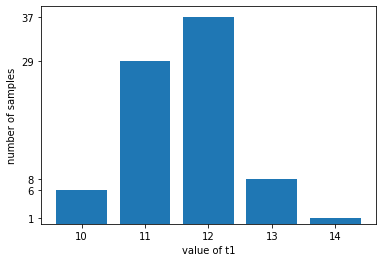

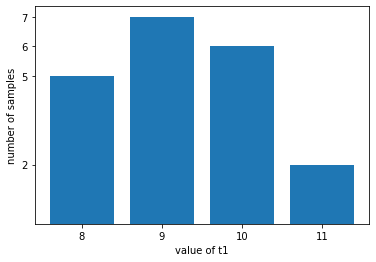

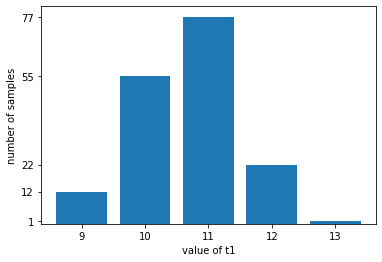

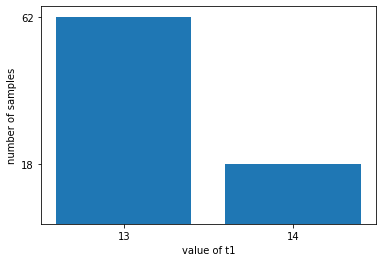

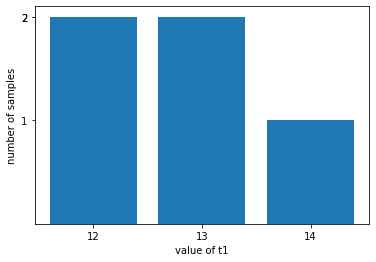

In [8]:
for num in [0, 1, 2, 3, 4]:
    path = '../../input/ost{}_{}.csv'.format(bit, num)
    df = pd.read_csv(path, sep=',')
    bqm = qda.make_Hamiltonian(df)
    time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)
    QDA = qda.QA_DSampler_AEmbedding(df, bqm, time_once, n, num_reads, chain_strength)
    valid_y_info_list, valid_y_num = QDA.find_valid_y_ntimes()
    
    plot_path = '{}/DwSamplerAutoEmbed_{}bit_{}_n10_num1000_strength12_t1_hist'.format(num, bit, num)
    QDA.y_num_t1_hist(valid_y_info_list, plot_path)

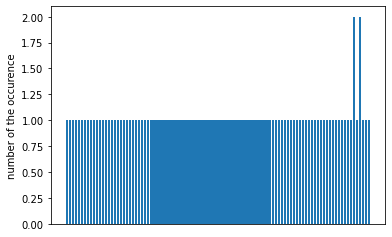

valid y occurrence of 25bit_0 data is 1.0196078431372548


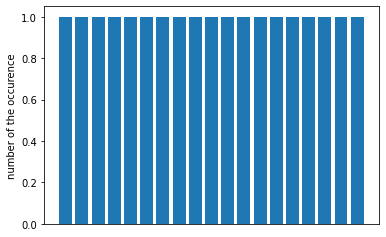

valid y occurrence of 25bit_1 data is 1.0


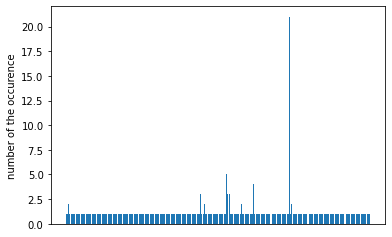

valid y occurrence of 25bit_2 data is 1.1538461538461537


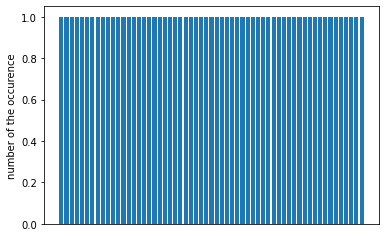

valid y occurrence of 25bit_3 data is 1.0


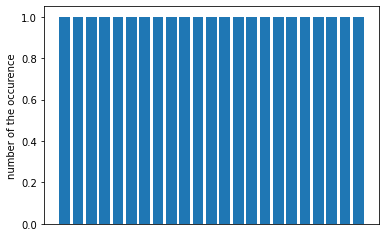

valid y occurrence of 25bit_4 data is 1.0
valid y occurrence of 25bit data is 1.0346907993966816


In [12]:
mean_occurrence_list = []
for num in [0, 1, 2, 3, 4]:
    path = '../../input/ost{}_{}.csv'.format(bit, num)
    df = pd.read_csv(path, sep=',')
    bqm = qda.make_Hamiltonian(df)
    time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)
    QDA = qda.QA_DSampler_AEmbedding(df, bqm, time_once, n, num_reads, chain_strength)
    valid_y_info_list, valid_y_num = QDA.find_valid_y_ntimes()
    
    plot_path = '{}/DwSamplerAutoEmbed_{}bit_{}_n10_num1000_strength12_occurance_hist'.format(num, bit, num)
    occurrence_list = qda.occurrence_hist(valid_y_info_list, plot_path)
    mean_occurrence = sum(occurrence_list)/len(occurrence_list)
    mean_occurrence_list.append(mean_occurrence)
    print('valid y occurrence of {}bit_{} data is {}'.format(bit, num, mean_occurrence))
print('valid y occurrence of {}bit data is {}'.format(bit, sum(mean_occurrence_list)/len(mean_occurrence_list)))

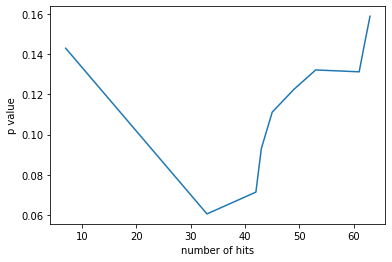

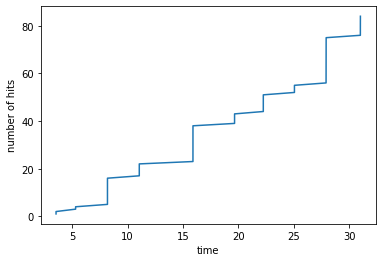

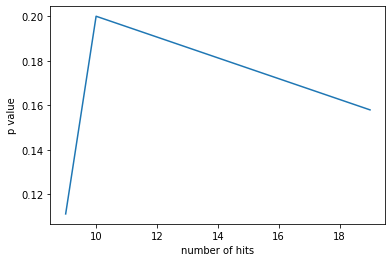

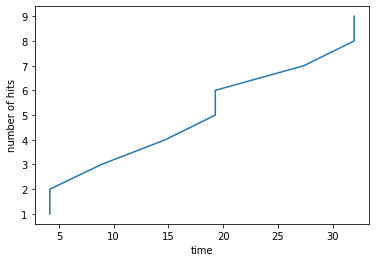

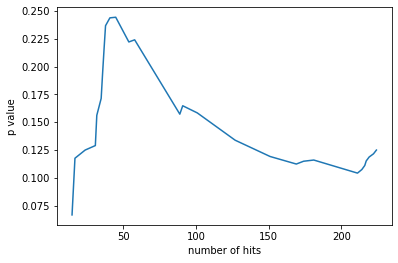

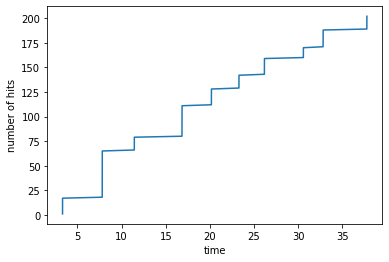

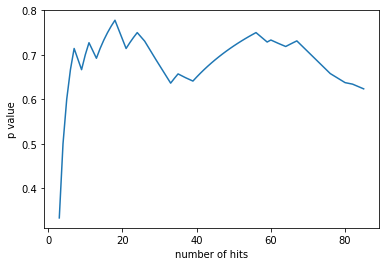

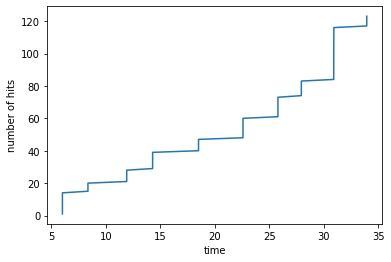

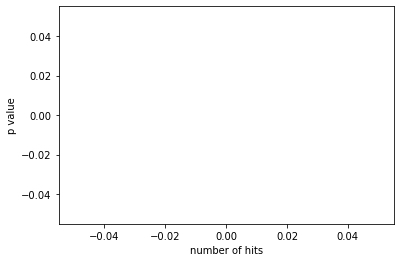

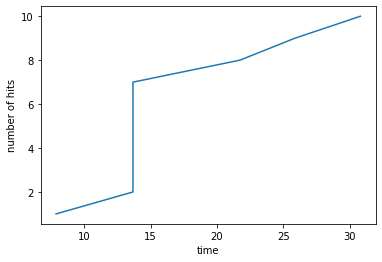

In [13]:
for num in [0, 1, 2, 3, 4]:
    path = '../../input/ost{}_{}.csv'.format(bit, num)
    df = pd.read_csv(path, sep=',')
    bqm = qda.make_Hamiltonian(df)
    time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)
    QDA = qda.QA_DSampler_AEmbedding(df, bqm, time_once, n, num_reads, chain_strength)
    valid_y_info_list, valid_y_num = QDA.find_valid_y_ntimes()
    
    output_path = '{}/DwSamplerAutoEmbed_{}bit_{}_n10_num1000_strength12_p_value_transition'.format(num, bit, num)
    valid_y_num, valid_y_list, p_dic = QDA.p_value_transition(valid_y_info_list, output_path)
    
    path = '{}/DSampler_AEmbed_{}bit_{}_time_num'.format(num, bit, num)
    valid_y_list, valid_y_num_list, time_list = QDA.time_num_y(path)